## About this notebook
This notebook has the experients done in **Uncovering differential equations from data with hidden variables** when some variables of the system are not observed. We analyze the oscilator, Rossler and Lorenz Attractor system when only one variable is observed. 


In [1]:
import numpy as np
import pandas as pd
import sys
import os
import warnings

In [2]:
notebooks_dir = get_ipython().starting_dir
sys.path.append(os.path.join(notebooks_dir, '..', '.'))

In [3]:
from src.scripts.ode.generate_data import generate_data
from src.lib.simulation_manager import Oscilator, LorenzAttractor, RoselerAttractor
from src.scripts.ode.fit_odefind import fit_and_save_coeffs
from src.scripts.config import data_path, results_path
from src.scripts.ode.integrate_predict import integrate_predict_smape
from src.scripts.ode.plot_predictions import plot_predictions , plot_times
from src.scripts.ode.mse_time_comparison import compare_coeffs, plot_mse_time, plot_coeffs

## Generate data

In [4]:
gen_data = [['LorenzAttractor', LorenzAttractor,[{'sigma': 10, 'rho': 28, 'beta': 8.0 / 3}]],
            ['rosseler', RoselerAttractor,[{'a': 0.52, 'b': 2, 'c': 4}]],
            ['oscilator',Oscilator,[{'a': 0.1, 'b': -1, 'c': 1, 'd': 0}] ]
           ]
for data_experiment_name, model_class, list_model_parms in gen_data:
    
    folder_data = generate_data(
                    num_experiments_per_param=20,
                    num_time_steps=5000,
                    dt=0.01,

                    data_experiment_name=data_experiment_name,
                    model_class=model_class,
                    list_model_params=list_model_parms
                )
    print(f'Data was saved in {folder_data}')

Data was saved in /home/yamila/projects/rte2020/L-ODEfind/examples/../data/LorenzAttractor
Data was saved in /home/yamila/projects/rte2020/L-ODEfind/examples/../data/rosseler
Data was saved in /home/yamila/projects/rte2020/L-ODEfind/examples/../data/oscilator


## Experiments setting
Select the system.

In [5]:
# gpomo_steps = 40 # fast run 
gpomo_steps = 5120 # paper results

In [6]:
# # Oscilator with x as observed variable
system = 'oscilator'
obs_vars = ['x']
targets = [1, 2, 3]
maxpolys = [3]
targets_to_plot = [1,2]

In [7]:
# # Rossler with x as observed variable
# system = 'rosseler'
# obs_vars = ['x']
# targets = [2,3]
# maxpolys = [3]
# targets_to_plot = targets

In [8]:
# # Rossler with y as observed variable
# system = 'rosseler'
# obs_vars = ['y']
# targets = [2,3]
# maxpolys = [3]
# targets_to_plot = targets

In [9]:
# # Lorenz Attractor with x as observed variable
# system = 'LorenzAttractor'
# obs_vars = ['x']
# targets = [2,3]
# maxpolys = [3]
# targets_to_plot = targets

In [10]:
# Temperature data set
# system = 'temperatures'
# obs_vars = ['x']
# targets = [2, 3]
# maxpolys = [3]
# targets_to_plot = targets

## Fit L-ODEfind models

In [11]:
%%time
model = system
out = system
warnings.filterwarnings("ignore")
fit_and_save_coeffs(model, out, targets=targets, maxpolys=maxpolys, obs_vars=obs_vars, testsize=200)


CPU times: user 11min 41s, sys: 4min 30s, total: 16min 11s
Wall time: 2min 4s


## Fit GPoMo models
We use R to fit GPoMo models. The library GPoM needs to be installed.

In [12]:
d_path = str(data_path.resolve()) + f'/{system}/'
r_path = str(results_path.resolve()) + f"/{system}_{'_'.join(obs_vars)}/"
v = '_'.join(obs_vars)

In [13]:
%%time
%cd ..
%cd r_scripts
! Rscript gpomo_predition_1_var_observed.R $d_path $r_path $v $gpomo_steps

/home/yamila/projects/rte2020/L-ODEfind
/home/yamila/projects/rte2020/L-ODEfind/r_scripts
Loading required package: GPoM
Loading required package: deSolve
Loading required package: rgl
[1] "/home/yamila/projects/rte2020/L-ODEfind/data/oscilator/"
[1] "/home/yamila/projects/rte2020/L-ODEfind/results/oscilator_x/"
[1] "x"
[1] "5120"
[1] "/home/yamila/projects/rte2020/L-ODEfind/data/oscilator/"
[1] "--------------------------"
[1] "solution_params_0_init_cond_0.csv"
[1] "--------------------------"
[1] "Doing steps: 5120 max time derivative 2 poly degree 3"
### For Istep = 10 (max: 5120), models to test: 10 / 10 
### For Istep = 20 (max: 5120), models to test: 10 / 10. Runtime: ~ 0h 0min 0.11s  
### For Istep = 40 (max: 5120), models to test: 10 / 10. Runtime: ~ 0h 0min 0.18s  
### Number of unclassified models: 10 / 10 
[1] "Time: 0.702754974365234"
[1] "Doing steps: 5120 max time derivative 3 poly degree 3"
### For Istep = 10 (max: 5120), models to test: 17 / 17 
### For Istep = 20 (max

### Number of unclassified models: 10 / 10 
[1] "Time: 0.583991289138794"
[1] "Doing steps: 5120 max time derivative 3 poly degree 3"
### For Istep = 10 (max: 5120), models to test: 17 / 17 
### For Istep = 20 (max: 5120), models to test: 17 / 17. Runtime: ~ 0h 0min 0.73s  
### For Istep = 40 (max: 5120), models to test: 17 / 17. Runtime: ~ 0h 0min 1.32s  
### Number of unclassified models: 17 / 17 
[1] "Time: 2.45658230781555"
[1] "--------------------------"
[1] "solution_params_0_init_cond_18.csv"
[1] "--------------------------"
[1] "Doing steps: 5120 max time derivative 2 poly degree 3"
### For Istep = 10 (max: 5120), models to test: 10 / 10 
### For Istep = 20 (max: 5120), models to test: 10 / 10. Runtime: ~ 0h 0min 0.09s  
### For Istep = 40 (max: 5120), models to test: 10 / 10. Runtime: ~ 0h 0min 0.17s  
### Number of unclassified models: 10 / 10 
[1] "Time: 0.544984102249146"
[1] "Doing steps: 5120 max time derivative 3 poly degree 3"
### For Istep = 10 (max: 5120), models to 

### Number of unclassified models: 10 / 10 
[1] "Time: 0.541452407836914"
[1] "Doing steps: 5120 max time derivative 3 poly degree 3"
### For Istep = 10 (max: 5120), models to test: 17 / 17 
### For Istep = 20 (max: 5120), models to test: 17 / 17. Runtime: ~ 0h 0min 0.28s  
### For Istep = 40 (max: 5120), models to test: 17 / 17. Runtime: ~ 0h 0min 0.56s  
### Number of unclassified models: 17 / 17 
[1] "Time: 1.67161154747009"
There were 50 or more warnings (use warnings() to see the first 50)
CPU times: user 649 ms, sys: 156 ms, total: 804 ms
Wall time: 49.9 s


## Integrate, predict and compute SMAPE for L-ODEfind and GPoMo models

In [14]:
%%time
odefind_model = f"{system}_{'_'.join(obs_vars)}_Odefind"
gpomo_model = f"{system}_{'_'.join(obs_vars)}"
for model_data, model_results in [[system,gpomo_model],[system, odefind_model]]:
    df = integrate_predict_smape(original_data=model_data, results_folder=model_results,
                             time_horizons=np.arange(1, 200, dtype=int),
                             testsize=200, one=False, verbose=True)


solution-gpomo_coefs-vars_x-dmax_2-poly_3-params_0-init_cond_0-steps_40.csv
Doing fit and predictions
solution-gpomo_coefs-vars_x-dmax_2-poly_3-params_0-init_cond_3-steps_40.csv
Doing fit and predictions
solution-gpomo_coefs-vars_x-dmax_3-poly_3-params_0-init_cond_18-steps_5120.csv
Doing fit and predictions
solution-gpomo_coefs-vars_x-dmax_2-poly_3-params_0-init_cond_1-steps_40.csv
Doing fit and predictions
solution-gpomo_coefs-vars_x-dmax_2-poly_3-params_0-init_cond_15-steps_40.csv
Doing fit and predictions
solution-gpomo_coefs-vars_x-dmax_3-poly_3-params_0-init_cond_5-steps_40.csv
Doing fit and predictions
solution-gpomo_coefs-vars_x-dmax_2-poly_3-params_0-init_cond_16-steps_40.csv
Doing fit and predictions
solution-gpomo_coefs-vars_x-dmax_2-poly_3-params_0-init_cond_13-steps_5120.csv
Doing fit and predictions
solution-gpomo_coefs-vars_x-dmax_3-poly_3-params_0-init_cond_11-steps_40.csv
Doing fit and predictions
solution-gpomo_coefs-vars_x-dmax_2-poly_3-params_0-init_cond_18-steps_512

solution-pdefind_coefs-vars_x-dmax_3-poly_3-params_0-init_cond_4-steps_0.csv
Doing fit and predictions
solution-pdefind_coefs-vars_x-dmax_2-poly_3-params_0-init_cond_7-steps_0.csv
Doing fit and predictions
solution-pdefind_coefs-vars_x-dmax_2-poly_3-params_0-init_cond_6-steps_0.csv
Doing fit and predictions
solution-pdefind_coefs-vars_x-dmax_1-poly_3-params_0-init_cond_16-steps_0.csv
Doing fit and predictions
solution-pdefind_coefs-vars_x-dmax_1-poly_3-params_0-init_cond_5-steps_0.csv
Doing fit and predictions
solution-pdefind_coefs-vars_x-dmax_2-poly_3-params_0-init_cond_9-steps_0.csv
Doing fit and predictions
solution-pdefind_coefs-vars_x-dmax_3-poly_3-params_0-init_cond_12-steps_0.csv
Doing fit and predictions
solution-pdefind_coefs-vars_x-dmax_2-poly_3-params_0-init_cond_5-steps_0.csv
Doing fit and predictions
solution-pdefind_coefs-vars_x-dmax_1-poly_3-params_0-init_cond_4-steps_0.csv
Doing fit and predictions
solution-pdefind_coefs-vars_x-dmax_1-poly_3-params_0-init_cond_19-steps

## Plot predictions comparison

System:oscilator with observed variables ['x']


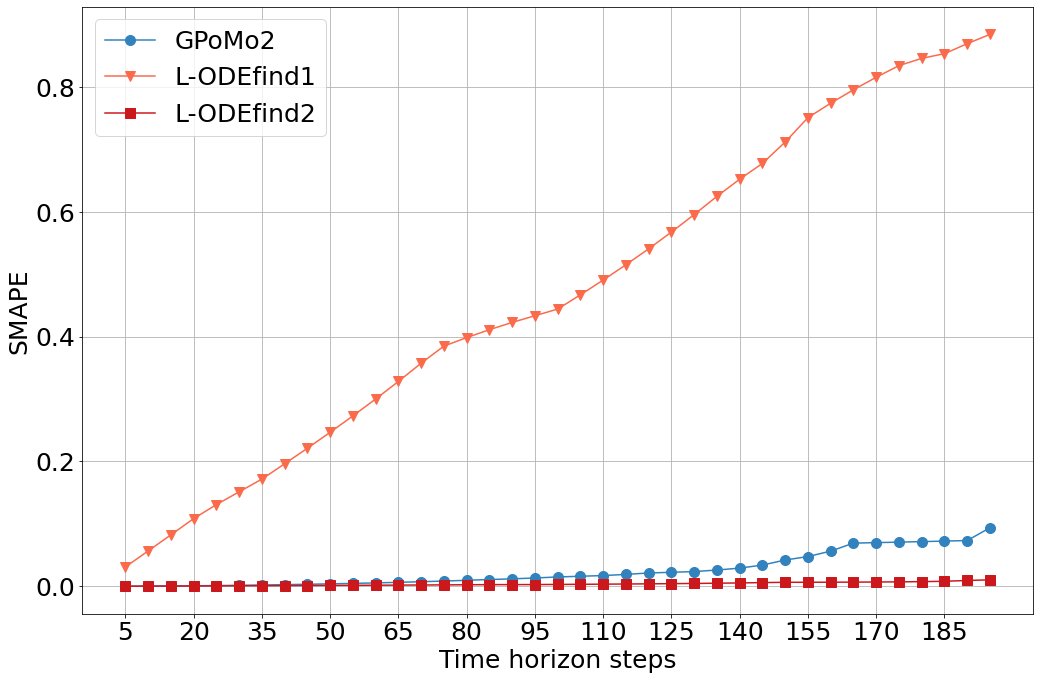

In [15]:
print(f'System:{system} with observed variables {obs_vars}')
plot_data = plot_predictions(path_gpomo = gpomo_model,
                             time_horizons = np.arange(5, 196, 5), 
                             path_pdefind = odefind_model, 
                             ymax = None, 
                             targets_to_plot = targets_to_plot)


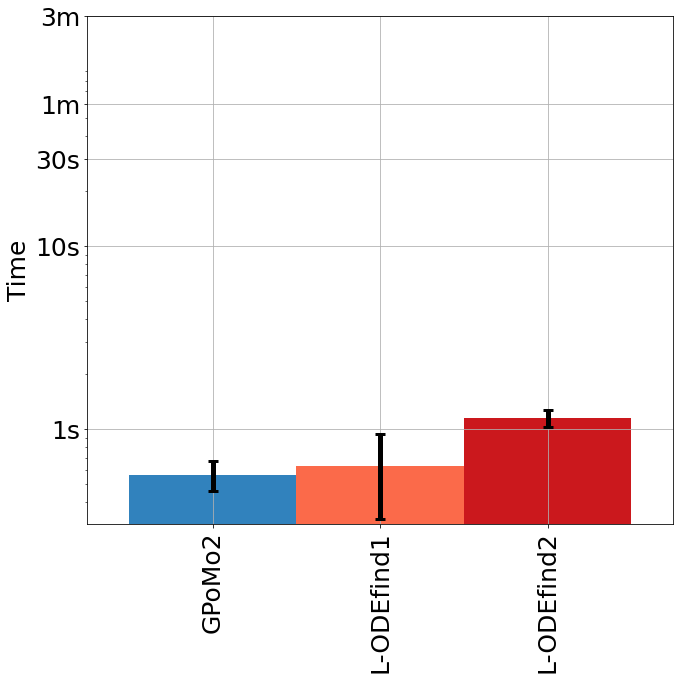

In [16]:
times_data = plot_times(gpomo_model, odefind_model,targets_to_plot=targets_to_plot)

## Analysis of the coeffiecients.
In the case of the oscilator (observed variable x) and Rossler (observed variable), it is possible to reconstruct a trajectory (equivalent to the original one) given only one of the model variables. In these system, we can compare the MSE between the true coefficients and the ones found by the algorithm. 

In [17]:
system = 'oscilator'
obs_vars = ['x']
var_name = 'X'
d = 2
fully_obs = False

In [18]:
# system = 'rosseler'
# obs_vars = ['y']
# var_name = 'Y'
# d = 3
# fully_obs = False

System: oscilator (observed variable ['x'])


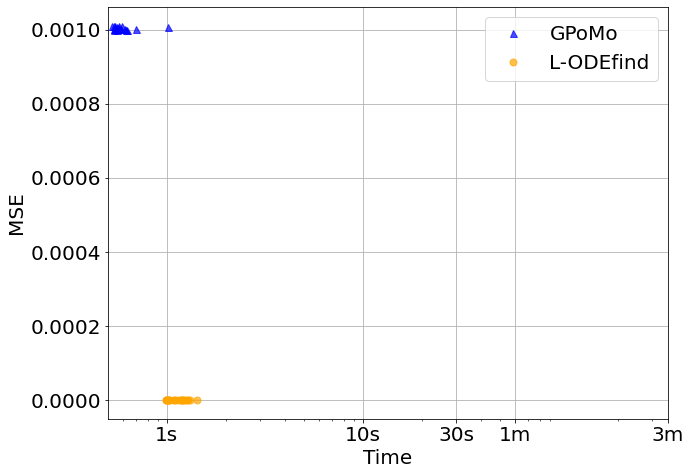

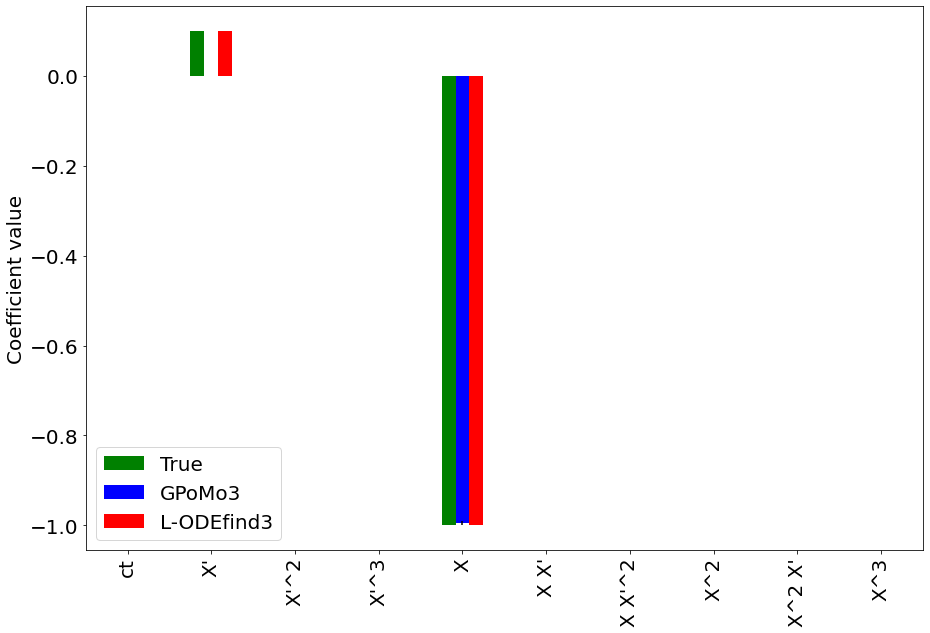

In [19]:
df_mse_gpomo, coeffs_gpomo = compare_coeffs(original_data=system, results_folder=system+'_'+'_'.join(obs_vars),
                                            var_name=var_name,
                                            d=d, fully_obs=fully_obs)
df_mse_odefind, coeffs_odefind = compare_coeffs(original_data=system, results_folder=system+'_'+'_'.join(obs_vars) + '_Odefind',
                                                var_name=var_name, d=d, fully_obs=fully_obs)

plot_mse_time(pd.concat([df_mse_gpomo, df_mse_odefind]), system+'_'+'_'.join(obs_vars))

if not fully_obs:
    coeffs = pd.concat([coeffs_gpomo, coeffs_odefind], axis=1)
    coeffs = coeffs.loc[:, ~coeffs.columns.duplicated()]
    plot_coeffs(coeffs, system+'_'+'_'.join(obs_vars), var_name, d)
    
print(f'System: {system} (observed variable {obs_vars})')
    